# Análisis de covtype.binary


In [1]:
import pandas as pd
from plotting import plot_comparatives
from utils import extract_parameters, sort_dataframe_by
ranking_size = 10
database = 'covtype.binary'
cv = 2
extension = f'{database}_cv_{cv}.csv'
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{extension}')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{extension}')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{extension}')
df_nystrom_and_svm = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_svm_classification_{extension}')
file_path_for_ksvm = f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/KSVM_classification_{database}_cv_{cv}.txt'


df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge, df_nystrom_and_svm]
df_labels = ['Nyström and ridge classification', 'RFF and ridge classification', 'Nystrom and svm classification']

damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = damping_formula(df.accuracy_test,df.training_time)


In [2]:
# get KSVM data
best_params, training_time, test_accuracy = extract_parameters(file_path_for_ksvm)
damping = damping_formula(float(test_accuracy),float(training_time))
df_KSVM = pd.DataFrame({
    'model': ['KSVM'],
    'training_time': [training_time],
    'accuracy_test': [test_accuracy],
    'damping': [damping],  
    'best_params': [best_params]
})

df_KSVM

constant_values = {
    "training_time" : [training_time],
    'accuracy_test' : [test_accuracy ],
    'damping': [damping]
}
constant_labels = ['KSVM']

In [3]:
# Concatenate the data frames while adding the model information
df_results = pd.concat([
    df_nystrom_and_ridge.assign(model="nystrom_and_ridge of n_comp. "+df_nystrom_and_ridge["n_components"].astype(str)),
    df_rbf_and_ridge.assign(model="rbf_and_ridge of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_nystrom_and_svm.assign(model="nystrom_and_svm of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_KSVM
], ignore_index=True)



# Reorder the columns as per your requirement
df_results = df_results[["model", "training_time", "accuracy_test", "damping", "best_params"]]

# Print the unified data frame
df_results

,model,training_time,accuracy_test,damping,best_params
0,nystrom_and_ridge of n_comp. 10,0.005418,0.616079,11371.333372,"{'nystroem__gamma': 0.0023148148148148147, 'ri..."
1,nystrom_and_ridge of n_comp. 20,0.012008,0.664701,5535.504866,"{'nystroem__gamma': 1.808449074074074e-05, 'ri..."
2,nystrom_and_ridge of n_comp. 50,0.183285,0.675343,368.466097,"{'nystroem__gamma': 0.0023148148148148147, 'ri..."
3,nystrom_and_ridge of n_comp. 100,0.771668,0.741446,96.083522,"{'nystroem__gamma': 0.00020460265659332975, 'r..."
4,nystrom_and_ridge of n_comp. 200,0.833420,0.748491,89.809593,"{'nystroem__gamma': 0.0023148148148148147, 'ri..."
5,nystrom_and_ridge of n_comp. 500,0.899240,0.750832,83.496271,"{'nystroem__gamma': 0.00020460265659332975, 'r..."
6,rbf_and_ridge of n_comp. 10,0.002699,0.572540,21213.838512,"{'rbf_sampler__gamma': 0.00020460265659332975,..."
7,rbf_and_ridge of n_comp. 20,0.004626,0.644913,13940.953500,"{'rbf_sampler__gamma': 0.0023148148148148147, ..."
8,rbf_and_ridge of n_comp. 50,0.023113,0.717046,3102.348022,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."
9,rbf_and_ridge of n_comp. 100,0.048542,0.739834,1524.110064,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."


# Damping 


In [4]:
column_name = 'damping'
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  damping


,model,training_time,accuracy_test,damping,best_params
6,rbf_and_ridge of n_comp. 10,0.002699,0.572540,21213.838512,"{'rbf_sampler__gamma': 0.00020460265659332975,..."
7,rbf_and_ridge of n_comp. 20,0.004626,0.644913,13940.953500,"{'rbf_sampler__gamma': 0.0023148148148148147, ..."
0,nystrom_and_ridge of n_comp. 10,0.005418,0.616079,11371.333372,"{'nystroem__gamma': 0.0023148148148148147, 'ri..."
1,nystrom_and_ridge of n_comp. 20,0.012008,0.664701,5535.504866,"{'nystroem__gamma': 1.808449074074074e-05, 'ri..."
13,nystrom_and_svm of n_comp. 10,0.015980,0.592671,3708.831223,"{'nystroem__gamma': 0.00020460265659332975, 's..."
8,rbf_and_ridge of n_comp. 50,0.023113,0.717046,3102.348022,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."
14,nystrom_and_svm of n_comp. 20,0.024644,0.681528,2765.529500,"{'nystroem__gamma': 0.00020460265659332975, 's..."
9,rbf_and_ridge of n_comp. 100,0.048542,0.739834,1524.110064,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."
19,KSVM,0.055213,0.758525,1373.823122,"{'svm__C': 10000.0, 'svm__gamma': 0.0002046026..."
10,rbf_and_ridge of n_comp. 200,0.063027,0.739880,1173.910966,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."


## Accuracy on test

In [5]:
column_name = "accuracy_test"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  accuracy_test


,model,training_time,accuracy_test,damping,best_params
19,KSVM,0.055213,0.758525,1373.823122,"{'svm__C': 10000.0, 'svm__gamma': 0.0002046026..."
18,nystrom_and_svm of n_comp. 500,0.788799,0.753293,95.498733,"{'nystroem__gamma': 0.026189140043946207, 'svm..."
17,nystrom_and_svm of n_comp. 200,0.578169,0.753098,130.255668,"{'nystroem__gamma': 0.026189140043946207, 'svm..."
5,nystrom_and_ridge of n_comp. 500,0.899240,0.750832,83.496271,"{'nystroem__gamma': 0.00020460265659332975, 'r..."
16,nystrom_and_svm of n_comp. 100,0.483689,0.749007,154.853169,"{'nystroem__gamma': 0.0023148148148148147, 'sv..."
4,nystrom_and_ridge of n_comp. 200,0.833420,0.748491,89.809593,"{'nystroem__gamma': 0.0023148148148148147, 'ri..."
15,nystrom_and_svm of n_comp. 50,0.174649,0.748388,428.509096,"{'nystroem__gamma': 0.0023148148148148147, 'sv..."
3,nystrom_and_ridge of n_comp. 100,0.771668,0.741446,96.083522,"{'nystroem__gamma': 0.00020460265659332975, 'r..."
11,rbf_and_ridge of n_comp. 500,0.099451,0.741142,745.234543,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."
12,rbf_and_ridge of n_comp. 1000,0.302920,0.740780,244.546681,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."


# Ranking by time

In [6]:
column_name = "training_time"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=True, ranking_size=ranking_size)

Sort by  training_time


,model,training_time,accuracy_test,damping,best_params
6,rbf_and_ridge of n_comp. 10,0.002699,0.572540,21213.838512,"{'rbf_sampler__gamma': 0.00020460265659332975,..."
7,rbf_and_ridge of n_comp. 20,0.004626,0.644913,13940.953500,"{'rbf_sampler__gamma': 0.0023148148148148147, ..."
0,nystrom_and_ridge of n_comp. 10,0.005418,0.616079,11371.333372,"{'nystroem__gamma': 0.0023148148148148147, 'ri..."
1,nystrom_and_ridge of n_comp. 20,0.012008,0.664701,5535.504866,"{'nystroem__gamma': 1.808449074074074e-05, 'ri..."
13,nystrom_and_svm of n_comp. 10,0.015980,0.592671,3708.831223,"{'nystroem__gamma': 0.00020460265659332975, 's..."
8,rbf_and_ridge of n_comp. 50,0.023113,0.717046,3102.348022,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."
14,nystrom_and_svm of n_comp. 20,0.024644,0.681528,2765.529500,"{'nystroem__gamma': 0.00020460265659332975, 's..."
9,rbf_and_ridge of n_comp. 100,0.048542,0.739834,1524.110064,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."
19,KSVM,0.055213,0.758525,1373.823122,"{'svm__C': 10000.0, 'svm__gamma': 0.0002046026..."
10,rbf_and_ridge of n_comp. 200,0.063027,0.739880,1173.910966,"{'rbf_sampler__gamma': 1.808449074074074e-05, ..."


# Plotting 


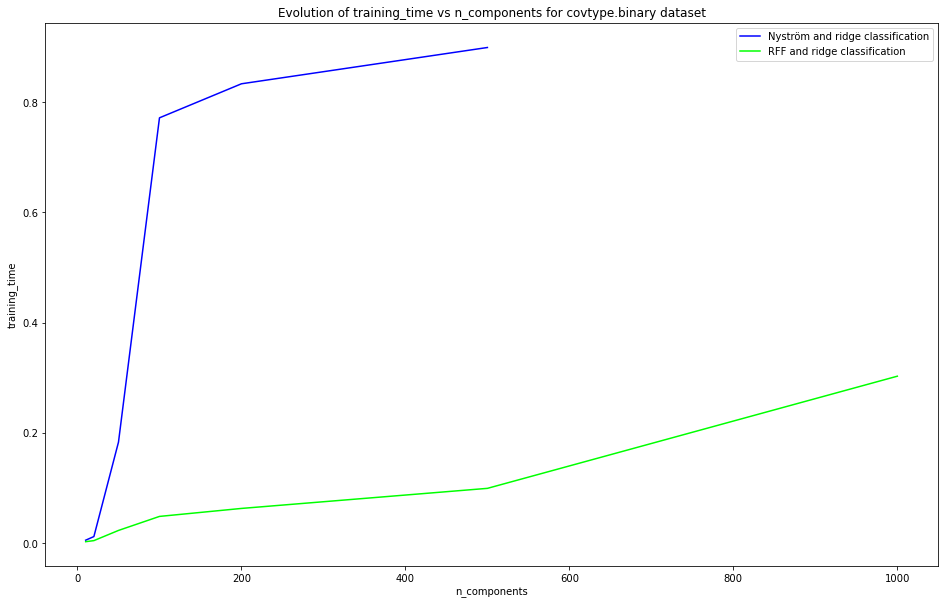

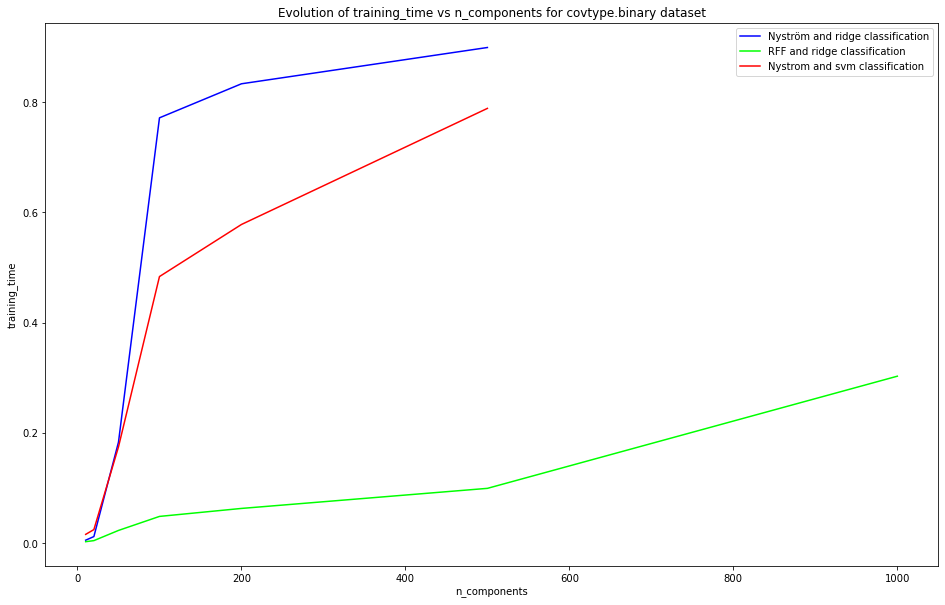

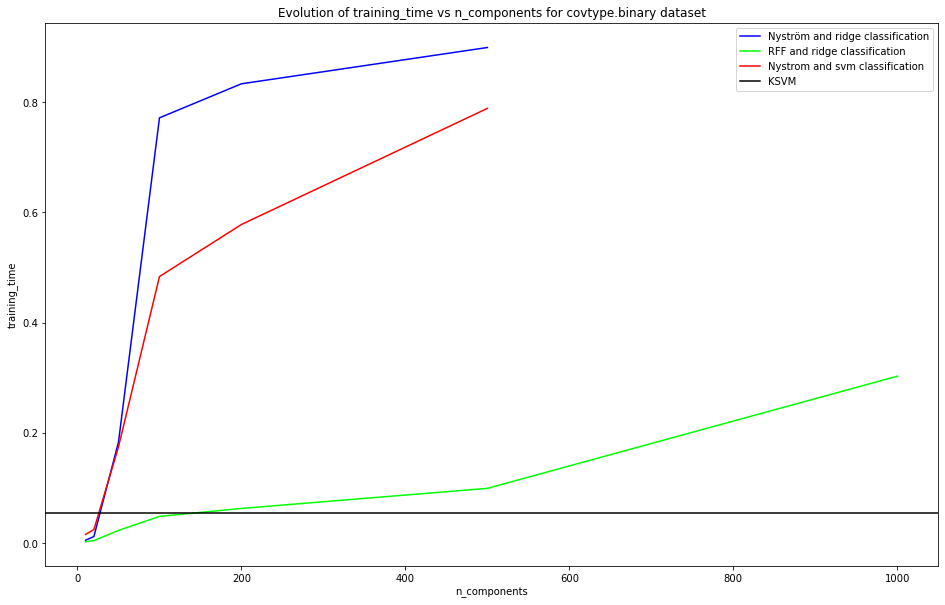

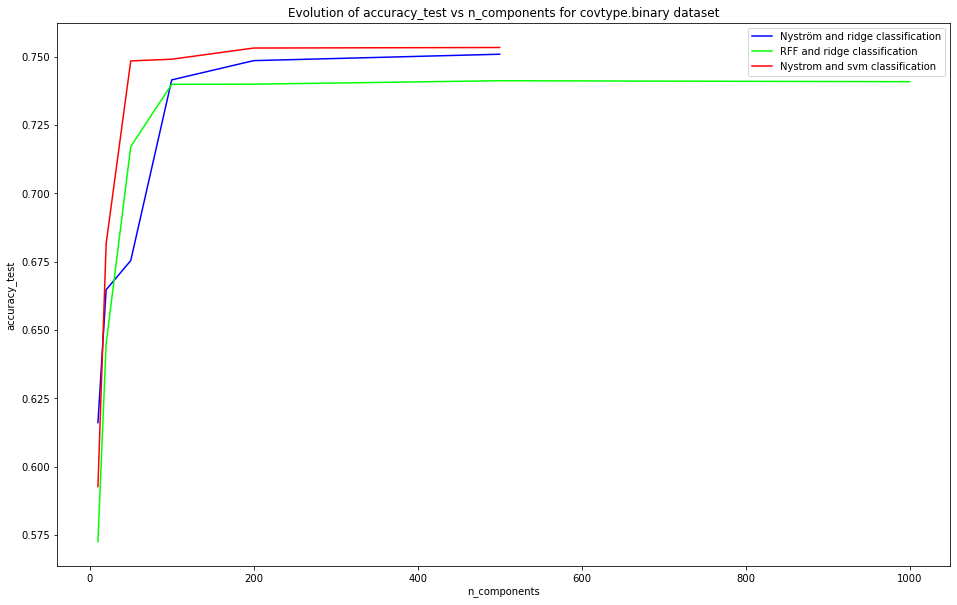

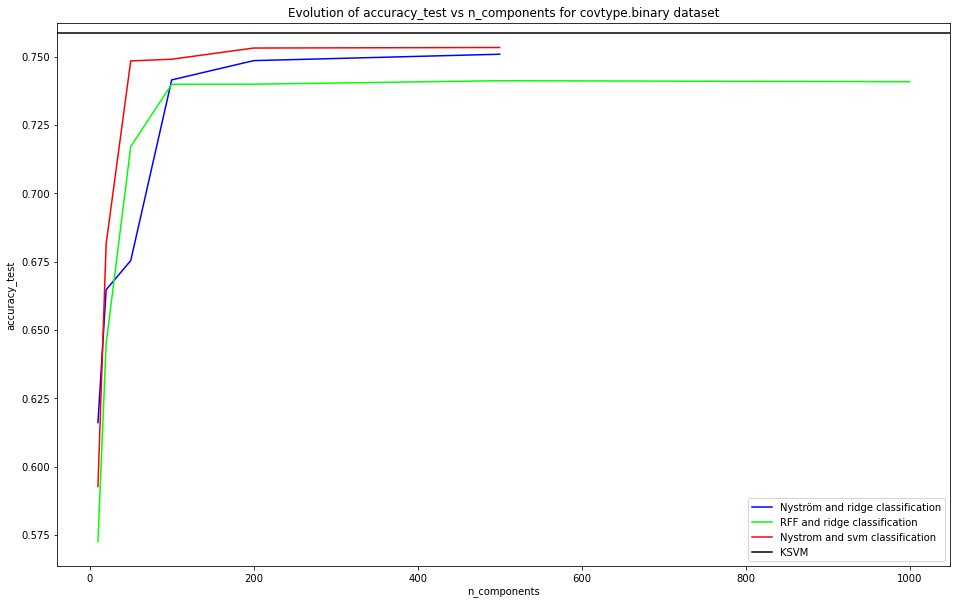

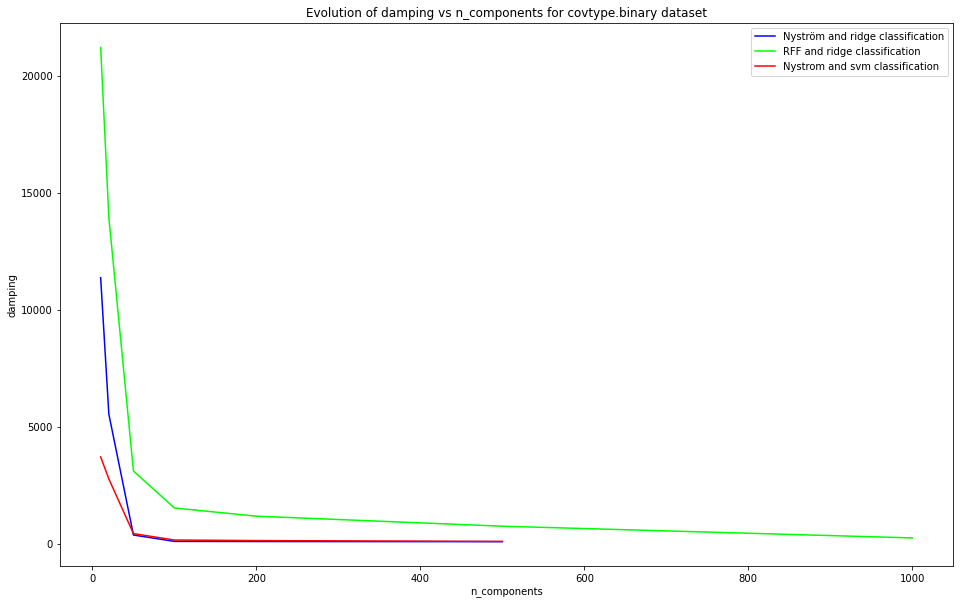

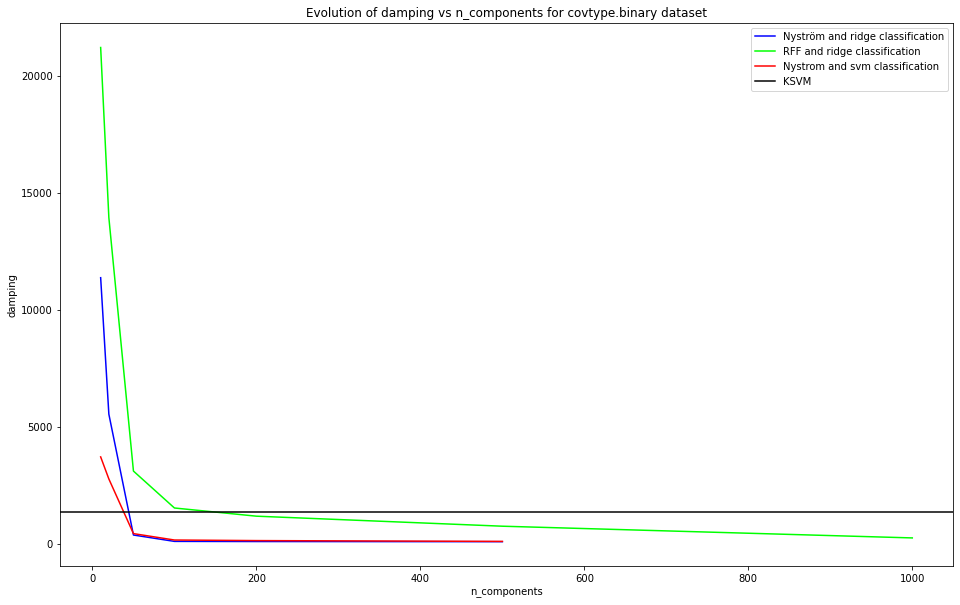

In [7]:

for column in ['training_time', 'accuracy_test', 'damping']:
    title = f'Evolution of {column} vs n_components for {database} dataset'
    if column == 'training_time':
        plot_comparatives(column=column, df_with_n_components=df_with_n_components[:-1], df_labels=df_labels[:-1], title=title)
    plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
    plot_comparatives(column, df_with_n_components, df_labels, title, constant_values[column], constant_labels , False)



In [8]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()


nn_accuracy.append(test_accuracy)
nn_training_time.append(training_time)
nn_labels.append('KSVM')

In [9]:
nn_accuracy,nn_training_time,nn_labels

([0.7620880760051404,
  0.7464487332476593,
  0.7411361758766294,
  0.7585253350468147],
 [4.3315629959106445,
  0.8571798801422119,
  0.270554780960083,
  0.05521273612976074],
 ['NN of shape (1200,)',
  'NN of shape (34, 34)',
  'NN of shape (10, 10, 10)',
  'KSVM'])

In [10]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

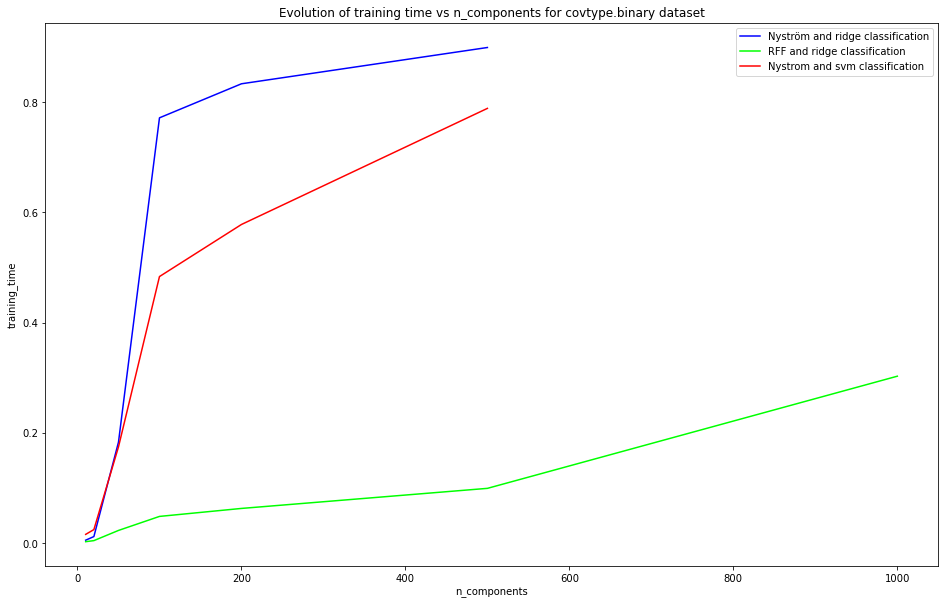

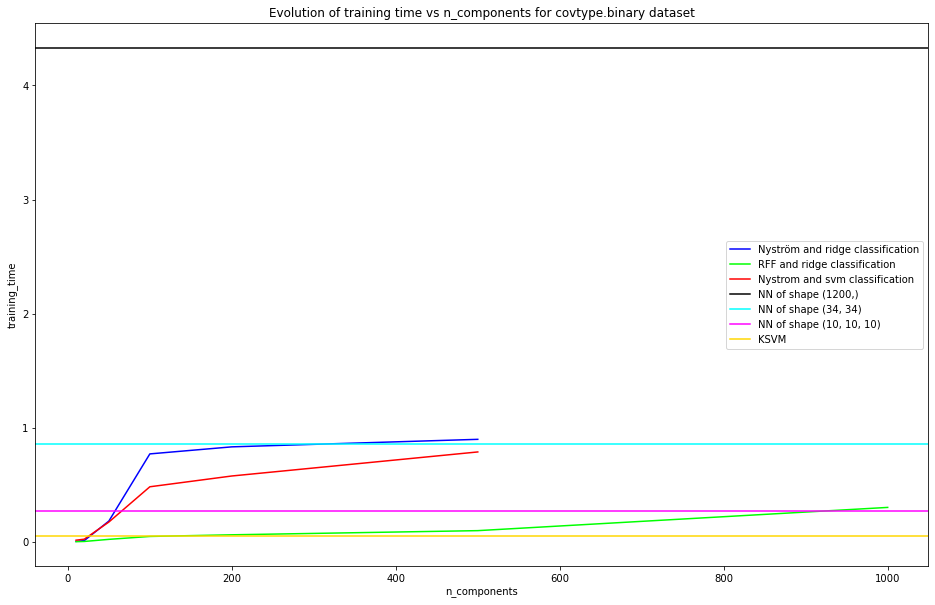

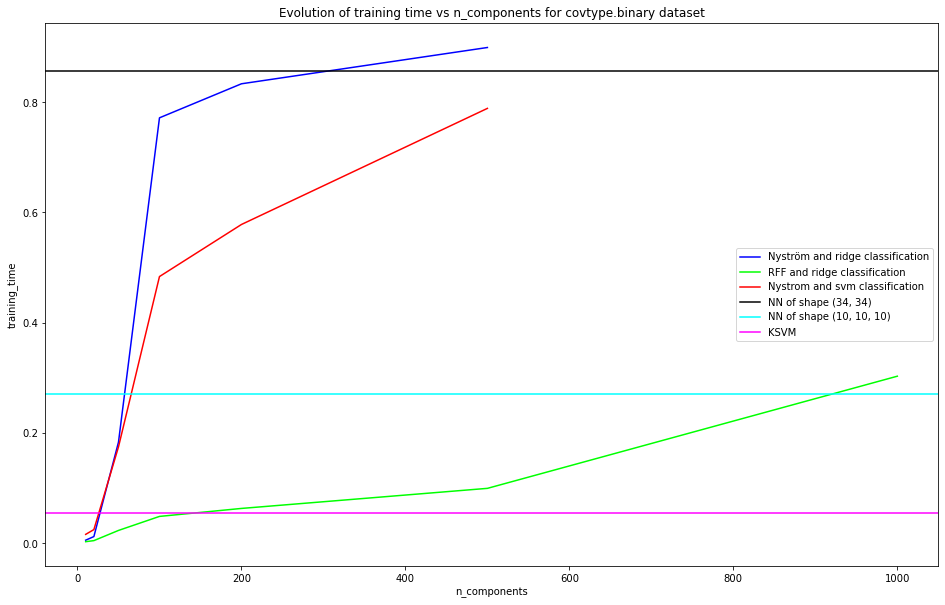

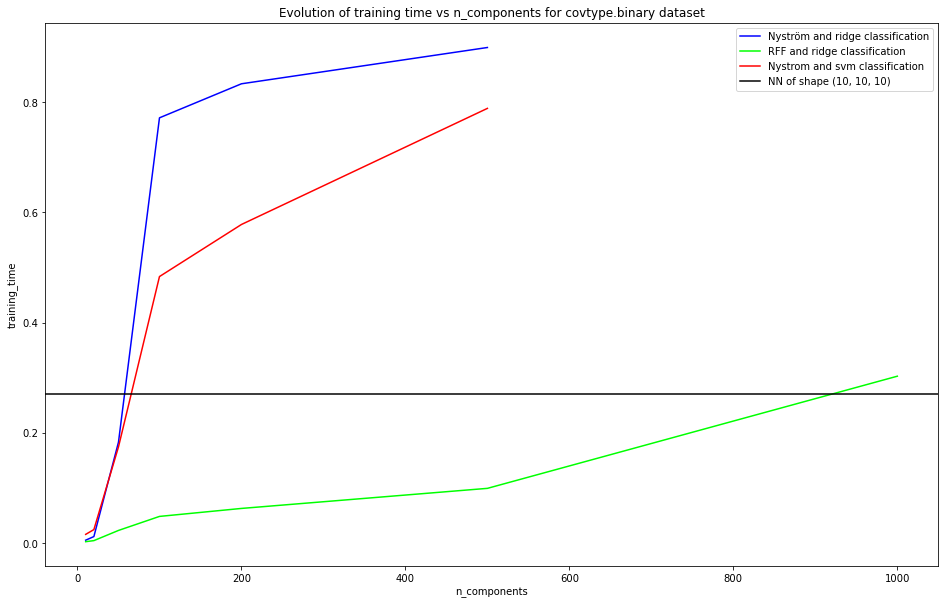

In [11]:

column = 'training_time'
title = f'Evolution of training time vs n_components for {database} dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO separate
# rm nn and add svc linear
# ksvm 
# rr Nystrom + rfb linear 
# usar intelet

# Accuracy 

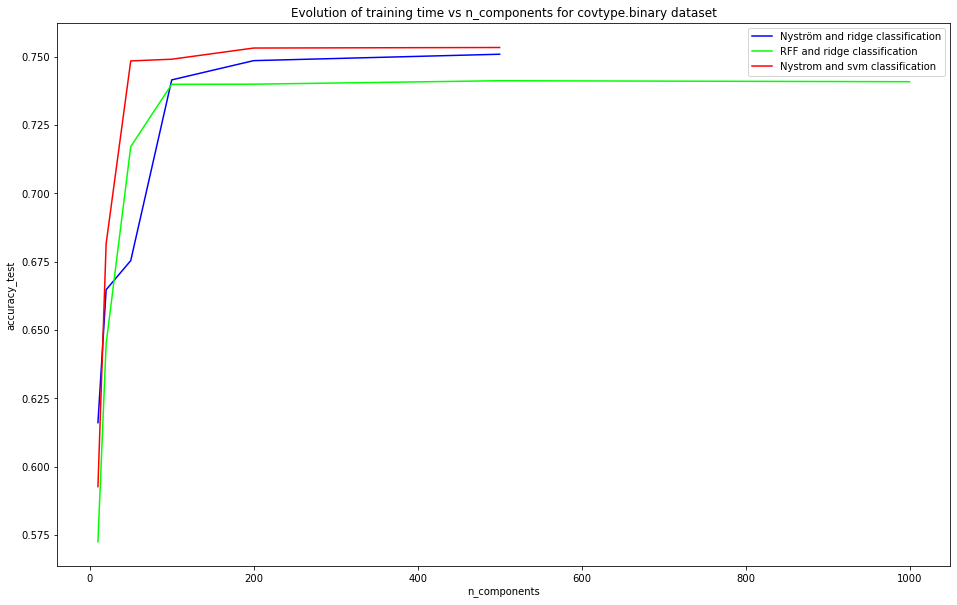

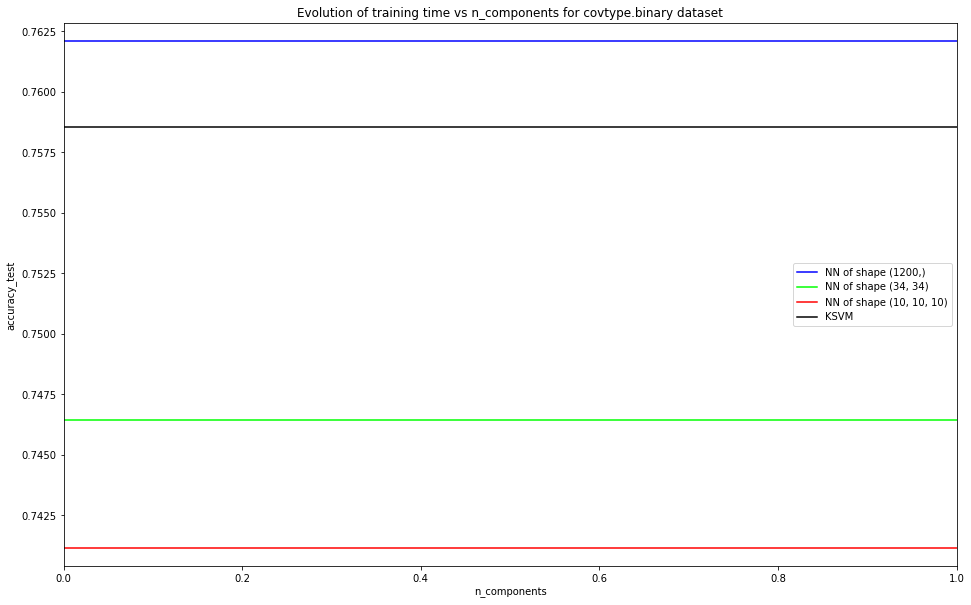

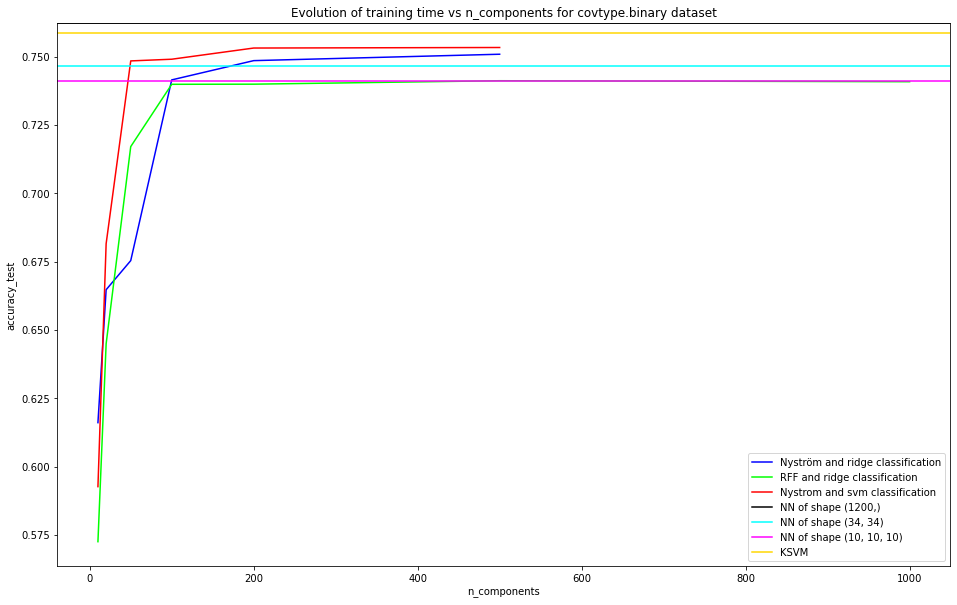

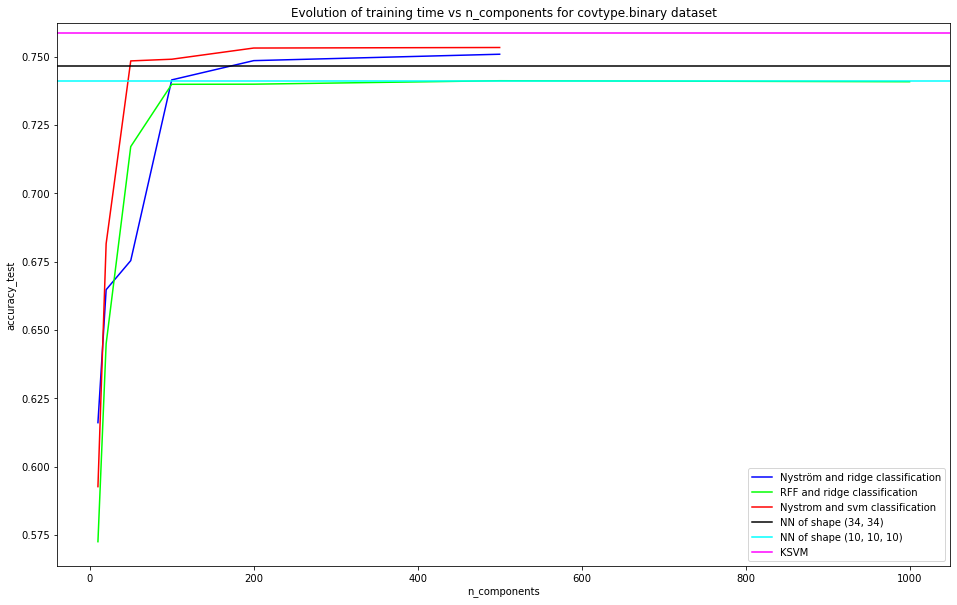

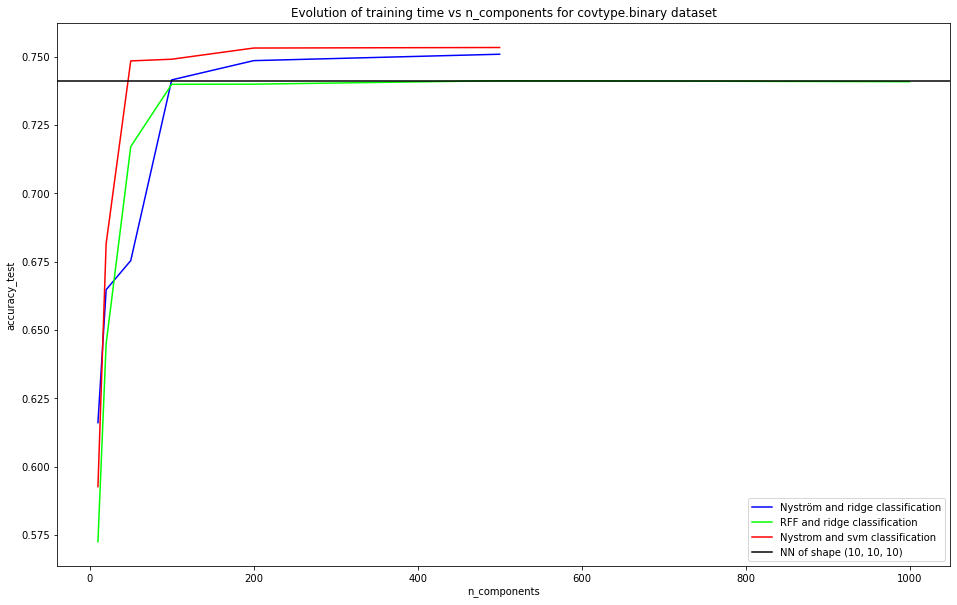

In [12]:
column = 'accuracy_test'

#df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
#title = 'Evolution of accuracy vs n_components for a9a dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

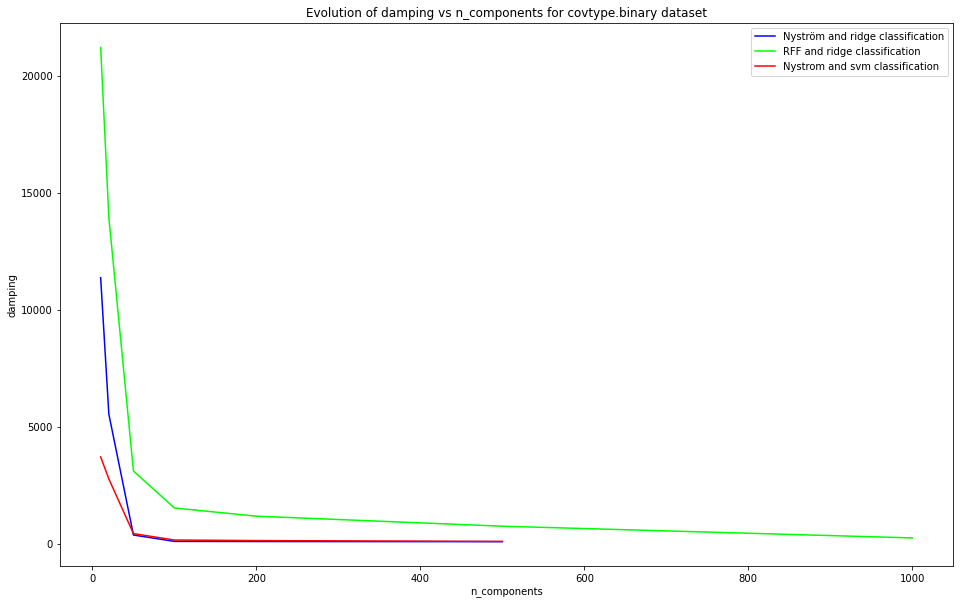

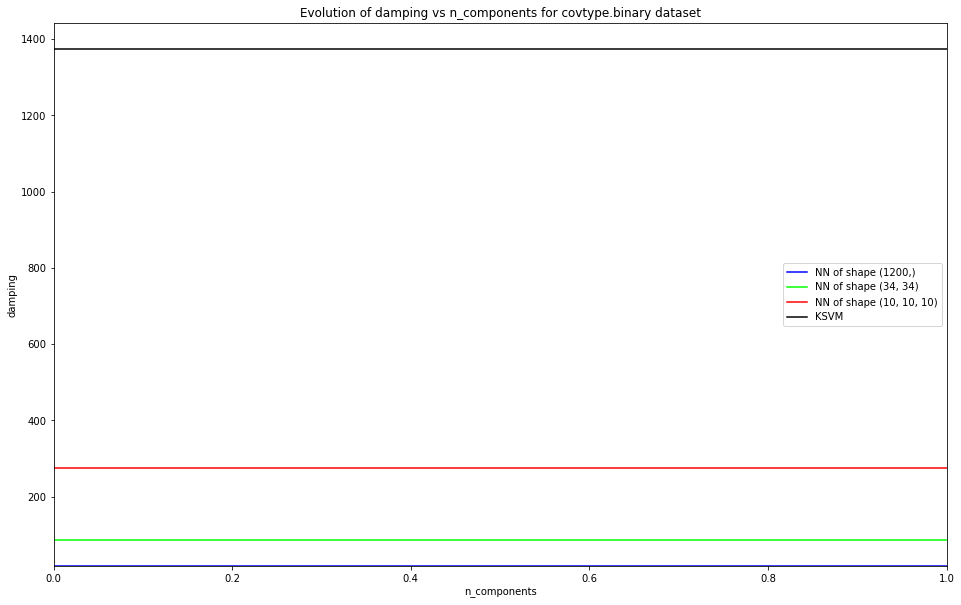

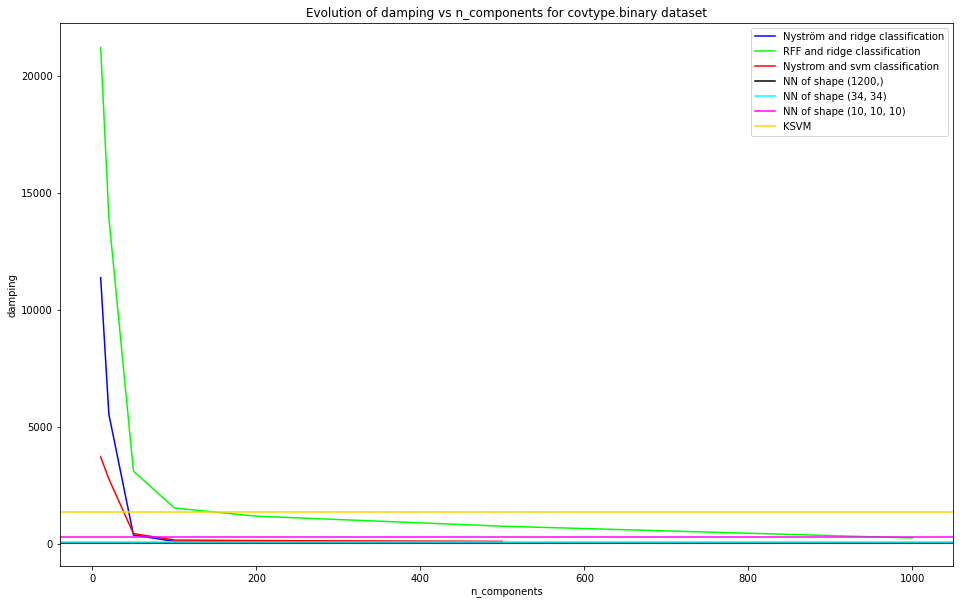

In [13]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]

# Plotting

column = damping_column
title = f'Evolution of damping vs n_components for {database} dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)